In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import io 
sys.path.append("../scripts")
sys.path.append("../")
from data_cleaner import DataCleaner
from util import Util
from plotter import Plotter

In [2]:
util = Util()
cleaner=DataCleaner()
plotter = Plotter()
cwd = os.getcwd()


### read  our data 
We have:<br>
store.csv with tag (store-v0) <br>
test.csv with tag (test-v0) <br>
train.csv with tag (train-v0)

In [3]:
repo="../"

store=util.read_from_dvc("data/store.csv",repo,"store-v0",low_memory=False)
test=util.read_from_dvc("data/test.csv",repo,"test-v0",low_memory=False)
train=util.read_from_dvc("data/train.csv",repo,"train-v0",low_memory=False)

### Store df consists of detailed information about each store

In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
print(store.shape)
store.info()

(1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### test data consists sales information on a daily basis (just without sales amount, that's what we need to predict)

In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Stores with NaN values of 'Open' on a specific date

In [8]:
test[test.isnull()["Open"]][["Store","Date","Open"]]

,Store,Date,Open
479,622,2015-09-17,NaN
1335,622,2015-09-16,NaN
2191,622,2015-09-15,NaN
3047,622,2015-09-14,NaN
4759,622,2015-09-12,NaN
5615,622,2015-09-11,NaN
6471,622,2015-09-10,NaN
7327,622,2015-09-09,NaN
8183,622,2015-09-08,NaN
9039,622,2015-09-07,NaN


### train data consists sales information and sales amount on a daily basis

In [9]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### merge our train and test data with the store data in order to get a good grasp of stores' info in each set

In [11]:
complete_train=store.merge(train,on="Store")
complete_train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [12]:
complete_test=store.merge(test,on="Store")
complete_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,7,2015-09-13,0.0,0,0,0


In [13]:
complete_test=cleaner.convert_to_datetime(complete_test,["Date"])
complete_train=cleaner.convert_to_datetime(complete_train,["Date"])

In [14]:
cleaner.percent_missing_column(complete_test,complete_test.columns)

,Col Name,Total,Missing,%,Data Type
8,Promo2SinceYear,41088,17232,41.94,float64
7,Promo2SinceWeek,41088,17232,41.94,float64
9,PromoInterval,41088,17232,41.94,object
4,CompetitionOpenSinceMonth,41088,15216,37.03,float64
5,CompetitionOpenSinceYear,41088,15216,37.03,float64
3,CompetitionDistance,41088,96,0.23,float64
13,Open,41088,11,0.03,float64
11,DayOfWeek,41088,0,0.00,int64
15,StateHoliday,41088,0,0.00,object
14,Promo,41088,0,0.00,int64


In [15]:
cleaner.percent_missing_column(complete_train,complete_train.columns)


,Col Name,Total,Missing,%,Data Type
9,PromoInterval,1017209,508031,49.94,object
7,Promo2SinceWeek,1017209,508031,49.94,float64
8,Promo2SinceYear,1017209,508031,49.94,float64
4,CompetitionOpenSinceMonth,1017209,323348,31.79,float64
5,CompetitionOpenSinceYear,1017209,323348,31.79,float64
3,CompetitionDistance,1017209,2642,0.26,float64
12,Sales,1017209,0,0.00,int64
16,StateHoliday,1017209,0,0.00,object
15,Promo,1017209,0,0.00,int64
14,Open,1017209,0,0.00,int64


### we have to handle those missing values

#### Fill missing data
- Categorical columns will be filled using mode() / frequent values
- numerical columns can be filled with either median or mean
 - for numerical columns the decision to use which method will be determined by observing the skewness of the data
 - When the data is skewed, it is good to consider using the median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data.
#### checking for skew
- 0 means No skew
- +ve value means right skew
- -ve value means left skew


In [16]:
# as seen from the above tables, Promo2SinceYear, Promo2SinceWeek, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, and Open are float data types
# we don't want to treat them as a number when filling missing values
# we shold convert them to str, fill missing data, and convert back to numbers

# target_cols=['Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Open']

# complete_test=cleaner.convert_to_string(complete_test,target_cols)
# complete_train=cleaner.convert_to_string(complete_train,target_cols)


In [17]:
# get all numerical columns and name them features
skew_data_test=pd.DataFrame(data=cleaner.get_numerical_columns(complete_test),columns=["Features"])
skew_data_train=pd.DataFrame(data=cleaner.get_numerical_columns(complete_train),columns=["Features"])

# get skew value for each column
skew_data_test["Skew"]=list(complete_test[cleaner.get_numerical_columns(complete_test)].skew())
skew_data_train["Skew"]=list(complete_train[cleaner.get_numerical_columns(complete_train)].skew())

# we don't care the direction of the skew (can be left skewed or right skewed) we only want its magnitude thus we take the absolute value of the skew
skew_data_test["Absolute Skew"] = skew_data_test["Skew"].abs()
skew_data_train["Absolute Skew"] = skew_data_train["Skew"].abs()
# we say a data is skewed if its absolute value is greater than .5
skew_data_test["Skewed"] = skew_data_test["Absolute Skew"].apply(lambda x : True if x>=0.5 else False) 
skew_data_train["Skewed"] = skew_data_train["Absolute Skew"].apply(lambda x : True if x>=0.5 else False) 


In [18]:
skew_data_test

,Features,Skew,Absolute Skew,Skewed
0,Store,0.010899,0.010899,False
1,CompetitionDistance,3.417436,3.417436,True
2,CompetitionOpenSinceMonth,-0.111400,0.111400,False
3,CompetitionOpenSinceYear,-8.264774,8.264774,True
4,Promo2,-0.326715,0.326715,False
5,Promo2SinceWeek,-0.058669,0.058669,False
6,Promo2SinceYear,-0.196708,0.196708,False
7,Id,0.000000,0.000000,False
8,DayOfWeek,0.028468,0.028468,False
9,Open,-2.008802,2.008802,True


In [30]:
# from the aboce table we can clearly see that competition distance is skewed,  we cannot take others as skewed because only competition distance is truly numeric
skewed_cols_test=["CompetitionDistance"]

In [19]:
skew_data_train

,Features,Skew,Absolute Skew,Skewed
0,Store,-0.000955,0.000955,False
1,CompetitionDistance,2.928534,2.928534,True
2,CompetitionOpenSinceMonth,-0.169862,0.169862,False
3,CompetitionOpenSinceYear,-7.539515,7.539515,True
4,Promo2,-0.002255,0.002255,False
5,Promo2SinceWeek,0.104528,0.104528,False
6,Promo2SinceYear,-0.120060,0.120060,False
7,DayOfWeek,0.001593,0.001593,False
8,Sales,0.641460,0.641460,True
9,Customers,1.598650,1.598650,True


In [29]:
# from the aboce table we can clearly see that competition distance is skewed,  we cannot take others as skewed because only competition,sales, and customers col are truly numeric
skewed_cols_train=["CompetitionDistance","Sales","Customers"]

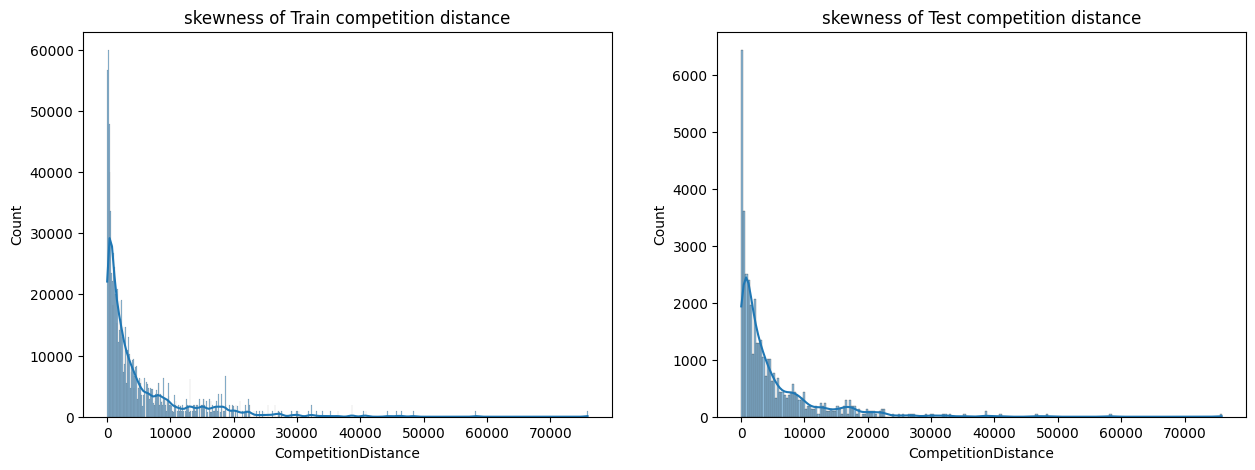

In [20]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1,title="skewness of Train competition distance")
sns.histplot(complete_train["CompetitionDistance"],kde=True)

plt.subplot(1,2,2,title="skewness of Test competition distance")
sns.histplot(complete_test["CompetitionDistance"],kde=True)

plt.show()

both are right skewed so we will use median of the series to fill na values

In [21]:
# get skewed column names 
# skewed_features= skew_data_test.query("Skewed")
# skewed_features = list(skewed_features["Features"])

# it is recomended to use median method for skewed_features
complete_test=cleaner.fill_missing_values_numeric(complete_test,"median",["CompetitionDistance"])
complete_train=cleaner.fill_missing_values_numeric(complete_train,"median",["CompetitionDistance"])

In [22]:
complete_test=cleaner.fill_missing_values_categorical(complete_test,"mode",columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"])
complete_train=cleaner.fill_missing_values_categorical(complete_train,"mode",columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear","PromoInterval"])

In [23]:
complete_test.isnull().sum()

Store                         0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
Id                            0
DayOfWeek                     0
Date                          0
Open                         11
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
dtype: int64

The only left column is 'Open' we can fill that with 0 and assume the store is not open on that specific date

In [26]:
complete_test=cleaner.fill_zeros(complete_test,["Open"])

In [27]:
complete_test.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Id                           0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [24]:
complete_train.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [ ]:
# from the aboce table we can clearly see that competition distance is skewed,  we cannot take others as skewed because only competition distance is truly numeric
skewed_cols_test=["CompetitionDistance"]

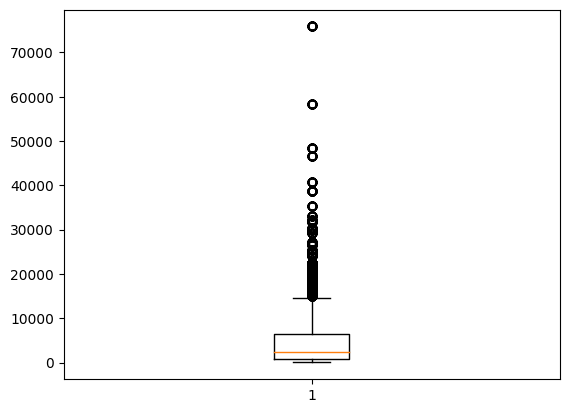

In [33]:

plt.boxplot(complete_test[skewed_cols_test])
plt.show()

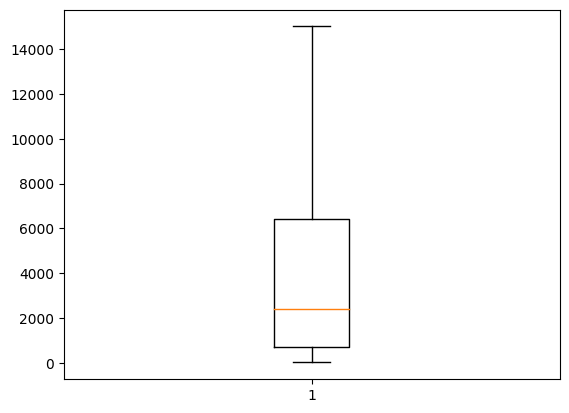

In [44]:
complete_test=cleaner.handle_outliers(complete_test,"CompetitionDistance")
plt.boxplot(complete_test[skewed_cols_test])
plt.show()

In [36]:
skewed_cols_train

['CompetitionDistance', 'Sales', 'Customers']

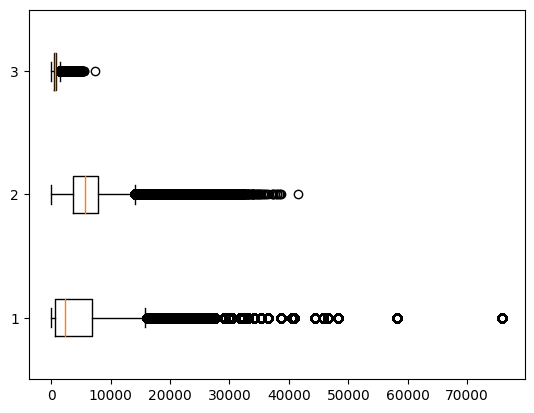

In [41]:
plt.boxplot(complete_train[skewed_cols_train],vert=False)
plt.show()

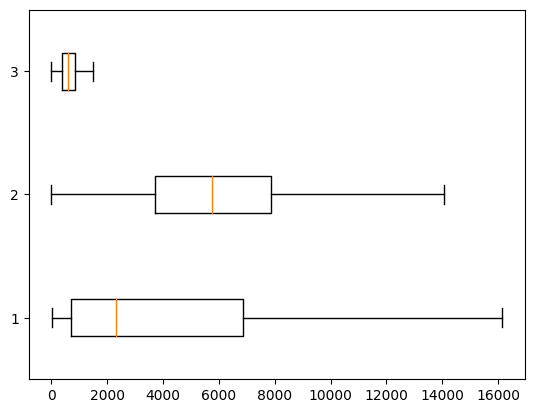

In [45]:
for col in skewed_cols_train:
    complete_train=cleaner.handle_outliers(complete_train,col)

plt.boxplot(complete_train[skewed_cols_train],vert=False)
plt.show()

In [47]:
# version our data as v1
complete_train.to_csv('../data/train.csv', index=False)
complete_test.to_csv('../data/test.csv', index=False)